In [1]:
!rm -rf neighborhoods
!rm *.zip
!conda install -q -y ffmpeg

rm: cannot remove ‘*.zip’: No such file or directory
Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::bleach==5.0.1=pyhd8ed1ab_0
  - conda-forge/noarch::pytest==7.2.0=pyhd8ed1ab_2
  - conda-forge/noarch::python-lsp-jsonrpc==1.0.0=pyhd8ed1ab_0
  - conda-forge/noarch::qtpy==2.3.0=pyhd8ed1ab_0
  - conda-forge/linux-64::sip==6.7.5=py310hd8f1fbe_0
  - conda-forge/noarch::tqdm==4.64.1=pyhd8ed1ab_0
  - conda-forge/linux-64::watchdog==2.2.1=py310hff52083_0
  - conda-forge/noarch::dask-core==2022.11.0=pyhd8ed1ab_0
  - conda-forge/noarch::flask==2.2.2=pyhd8ed1ab_0
  - conda-forge/noarch::importlib_metadata==6.0.0=hd8ed1ab_0
  - conda-forge/noarch::nltk==3.8.1=pyhd8ed1ab_0
  - conda-forge/linux-64::pyqt5-sip==12.11.0=py310hd8f1fbe_2
  - conda-forge/noarch::python-lsp-server-base==1.7.0=pyhd8ed1ab_0
  - conda-forge/noarch::pytoolconfig==1.2.4=pyhd8ed1ab_1
  - c

In [2]:
!wget https://dl3.pushbulletusercontent.com/uUN2AiPUxxvqfJlWaWhbhNQdZVrprSBu/code.zip
!unzip code.zip
!rm EC.py
!rm mnca.py

--2023-04-30 16:50:00--  https://dl3.pushbulletusercontent.com/uUN2AiPUxxvqfJlWaWhbhNQdZVrprSBu/code.zip
Resolving dl3.pushbulletusercontent.com (dl3.pushbulletusercontent.com)... 35.208.62.122
Connecting to dl3.pushbulletusercontent.com (dl3.pushbulletusercontent.com)|35.208.62.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4934 (4.8K) [application/x-zip-compressed]
Saving to: ‘code.zip’

100%[======================================>] 4,934       --.-K/s   in 0s      

2023-04-30 16:50:00 (49.6 MB/s) - ‘code.zip’ saved [4934/4934]

Archive:  code.zip
  inflating: EC.py                   
  inflating: mnca.py                 
  inflating: neighborhoods/mask_c1.txt  
  inflating: neighborhoods/mask_c2.txt  
  inflating: neighborhoods/mask_c3.txt  


In [3]:
rule = [[(0.451, 0.713, 0), (0.449, 0.663, 1), (0.191, 0.52, 1), (0.089, 0.296, 0)], [(0.332, 0.51, 0), (0.084, 0.307, 0), (0.182, 0.465, 1)], [(0.799, 0.902, 0), (0.303, 0.456, 0), (0.835, 0.984, 1)]]

# FOR EC - Results available here - https://github.com/s4nyam/emnca/blob/main/emnca/p10g50_1.ipynb



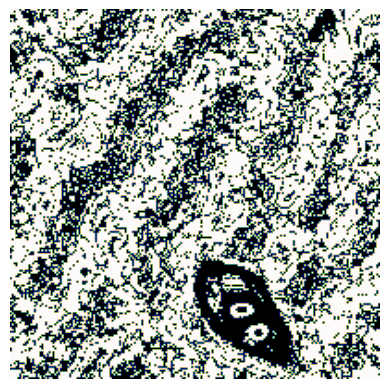

In [11]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)


############# FHCG SECTION ##############
############# FHCG SECTION ##############
############# FHCG SECTION ##############
############# FHCG SECTION ##############
def blockshaped(arr, nrows, ncols):
    
    h, w = arr.shape
    assert h % nrows == 0, f"{h} rows is not evenly divisible by {nrows}"
    assert w % ncols == 0, f"{w} cols is not evenly divisible by {ncols}"
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))


def FrequencyHistogramCoarseGraining(array_3d):
    import numpy as np
    time_steps,width,height = array_3d.shape
    # Let us split NxN array to smaller 2x2 blcks
    super_cells_list_volumetric =  []
    new_board_volumetric_supercells_list = []
    threshold1 = 0.023
    # what are the lower limits of thresh and upper limits of thresh?
    # threshold2 = 0.06 # For multi state MNCA
    
    # given block shape of 2,2 says that we have a chunk of 2x2 that partitions complete w,h

    for grid_2d in array_3d:
      blocked_grid_2d = blockshaped(grid_2d,2,2)
      for each_sub_array in blocked_grid_2d:
        super_cells_list_volumetric.append(list(each_sub_array.flatten()))
    test_array=np.array(super_cells_list_volumetric)
    print(test_array.shape)
    for i in range(len(super_cells_list_volumetric)):
      count = 0
      for j in range(len(super_cells_list_volumetric)):
        if(super_cells_list_volumetric[i]==super_cells_list_volumetric[j]):
          count = count+1 # count is number of blocks matching in the same grid (ref literature)
      new_board_volumetric_supercells_list.append(count/len(super_cells_list_volumetric))
    
    import numpy as np
    import matplotlib.pyplot as plt
    plt.hist(new_board_volumetric_supercells_list, edgecolor='black')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    # plt.savefig("hist.png")s
    plt.show()
    plt.close()
    for k in range(len(new_board_volumetric_supercells_list)):
      if(new_board_volumetric_supercells_list[k] < threshold1):
        new_board_volumetric_supercells_list[k]=1
      else:
        new_board_volumetric_supercells_list[k]=0
            
    modified_board = np.array(new_board_volumetric_supercells_list)
    shape = int(np.sqrt(len(new_board_volumetric_supercells_list)/time_steps))
    # print(shape)
    modified_board_return = modified_board.reshape(time_steps,shape,shape)
    return modified_board_return
############# FHCG SECTION ##############    
############# FHCG SECTION ##############
############# FHCG SECTION ##############
############# FHCG SECTION ##############





def init_board(width, height, init_state):
    if init_state == "single cell in center":
        board = np.zeros((height, width), dtype=np.int)
        board[height//2, width//2] = 1
    elif init_state == "random cells with some probability":
        p = 0.250 # probability of a cell being alive
        board = np.random.choice([0, 1], size=(height, width), p=[1-p, p])
    elif init_state == "random cells with 2 different states":
        p1 = 0.250 # probability of a cell being state 1
        board = np.random.choice([0, 1, 2], size=(height, width), p=[1-p1, p1/2, p1/2])
    else:
        raise ValueError("Invalid initial state")
    return board

volume_board_data = []
def update(frame, img, board, neighborhoods, range_of_neighborhood_sums):
    new_board = np.zeros_like(board, dtype=int)
    height, width = board.shape
    for i in range(height):
        for j in range(width):
            next_state = board[i, j]
            for neighborhood, range_of_neighborhood_sum in zip(neighborhoods, range_of_neighborhood_sums):
                cell_neighborhood = [board[(i + ni + height) % height, (j + nj + width) % width]
                                     for ni, nj in neighborhood]
                
                # # use this for sum
                # neighborhood_sum = sum(cell_neighborhood)
                
                # use this for average
                neighborhood_sum = sum(cell_neighborhood)/len(cell_neighborhood)
                for lower, upper, new_next_state in range_of_neighborhood_sum:
                    if lower <= neighborhood_sum <= upper:
                        next_state = new_next_state
            new_board[i, j] = next_state
    board[:] = new_board[:]
    # board = FrequencyHistogramCoarseGraining(board) # Adding coarse grained
    import copy
    volume_board_data.append(copy.deepcopy(board)) # Collecting boaards in a list for coarse grianing
    img.set_data(board)
    return img,

def run_automaton(width, height, steps, init_state, filename, neighborhoods, range_of_neighborhood_sums):
    board = init_board(width, height, init_state)
    fig, ax = plt.subplots()
    plt.axis('off')
    img = ax.imshow(board, cmap='gist_earth')
    ani = animation.FuncAnimation(fig, update, frames=steps, fargs=(img, board, neighborhoods, range_of_neighborhood_sums), repeat=False)
    # ani.save(filename, dpi=80, writer='imagemagick')
    ani.save(filename, dpi=200, writer='ffmpeg', codec='h264')



def extract_neighborhood_from_file(file_name):
    with open(file_name, "r") as f:
        lines = f.readlines()
        neighborhood = []
        for i, line in enumerate(lines):
            line = line.strip()
            for j, value in enumerate(line.split(" ")):
                if value == "1":
                    neighborhood.append((i-1, j-1))
        return neighborhood


width = 200
height = 200
steps = 49
init_state = "random cells with some probability"




nh1 = extract_neighborhood_from_file('neighborhoods/mask_c1.txt')
nh2 = extract_neighborhood_from_file('neighborhoods/mask_c2.txt')
nh3 = extract_neighborhood_from_file('neighborhoods/mask_c3.txt')
neighborhoods = [nh1,nh2,nh3]
range_of_neighborhood_sums=rule



filename = "HD.mp4"
run_automaton(width, height, steps, init_state, filename, neighborhoods, range_of_neighborhood_sums)


In [12]:
import numpy as np
grid_array = np.array(volume_board_data)
print(grid_array.shape)


(50, 200, 200)


(500000, 4)


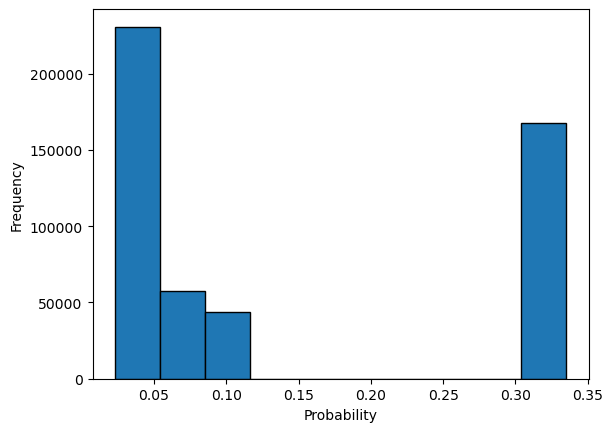

In [ ]:
fhcg = FrequencyHistogramCoarseGraining(grid_array)

In [ ]:
print(fhcg.shape)

(50, 100, 100)


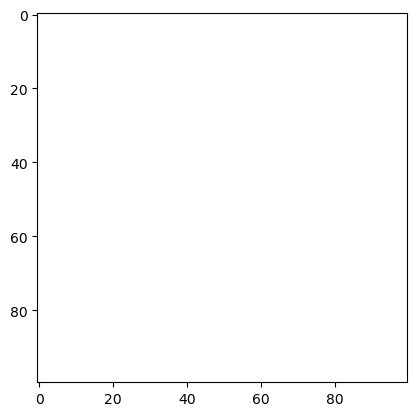

In [ ]:
for i in range(len(fhcg)):
  plt.imshow(fhcg[i],cmap="binary")
  filename = "{:04d}.png".format(i)
  plt.savefig(filename)
from PIL import Image
import os

def create_gif(directory, output_filename):
    # Find all PNG files in the directory
    filenames = [f for f in os.listdir(directory) if f.endswith('.png')]
    # Sort the filenames in numerical order
    filenames.sort(key=lambda x: int(x[:-4]))
    # Open the first image to get the size
    with Image.open(os.path.join(directory, filenames[0])) as im:
        # Create an ImageSequence from the PNG files
        sequence = [Image.open(os.path.join(directory, f)) for f in filenames]
        # Save the sequence as an animated GIF
        sequence[0].save(output_filename,
                         save_all=True,
                         append_images=sequence[1:],
                         duration=100,      # Duration of each frame (in ms)
                         loop=0)            # Number of loops (0 means infinite)

# Example usage:
create_gif('.', 'animation_cg.gif')


In [ ]:
!rm *.png